https://www.youtube.com/watch?v=Y_hzMnRXjhI

In [5]:
import json

data = []
for line in open('/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json', 'r'):
    data.append(json.loads(line))
print(data[0])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}


In [6]:
sentences = []
labels = []
urls = []

for item in data:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

Preprocessing

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#tokenizer = Tokenizer(oov_token="<OOV>")
#tokenizer.fit_on_texts(sentences)
#word_index = tokenizer.word_index

#sequences = tokenizer.texts_to_sequences(sentences)
#padded = pad_sequences(sequences, padding='post')
#print(padded[0])   #print tokenized sequence
#print(padded.shape) #shape of entire corpus

We have a list of 26,709 sequences. We don't have test train split. We will now split data to test and train data and use Tokenizer only on Training data

In [7]:
training_size = 20000
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [16]:
vocab_size = 10000
oov_tok = "<OOV>"
max_length = 100
padding_type='post'
trunc_type='post'
embedding_dim = 16

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok) #instantiate tokenizer
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [14]:
import json
import tensorflow as tf
from keras.layers import Embedding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

We used token number fro each words. Now how do we detect sarcasm from numbers or determine meaning from numbers ? We will use a concept called EMBEDDING.

In EMBEDDING, we learn the direction of each word epoch by epoch

In [17]:
 model = tf.keras.Sequential([
     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
     tf.keras.layers.GlobalAveragePooling1D(),
     tf.keras.layers.Dense(24, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
 ])

 model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


 num_epochs = 30

 history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 5s - loss: 0.6675 - accuracy: 0.5821 - val_loss: 0.5922 - val_accuracy: 0.6549 - 5s/epoch - 8ms/step
Epoch 2/30
625/625 - 2s - loss: 0.4328 - accuracy: 0.8293 - val_loss: 0.3860 - val_accuracy: 0.8371 - 2s/epoch - 3ms/step
Epoch 3/30
625/625 - 2s - loss: 0.3134 - accuracy: 0.8747 - val_loss: 0.3539 - val_accuracy: 0.8529 - 2s/epoch - 3ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2613 - accuracy: 0.8982 - val_loss: 0.3447 - val_accuracy: 0.8569 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2267 - accuracy: 0.9116 - val_loss: 0.3511 - val_accuracy: 0.8481 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1976 - accuracy: 0.9251 - val_loss: 0.3526 - val_accuracy: 0.8562 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1756 - accuracy: 0.9329 - val_loss: 0.3642 - val_accuracy: 0.8518 - 2s/epoch - 3ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1582 - accuracy: 0.9412 - val_loss: 0.3875 - val_accuracy: 0.8511 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

81 % Accuracy on Test data

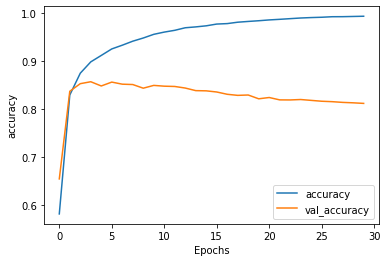

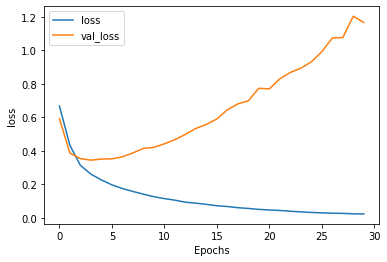

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 70ms/step
[[8.4131688e-01]
 [1.7694406e-06]]


1st sentence has high chance of sarcasm
2nd sentence has low chance of sarcasm.